### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn으로 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 합성곱신경망 이미지 분류

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [11]:
(train_input, train_target),(test_input, test_target) = load_data()

In [12]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled.shape

(60000, 28, 28, 1)

In [13]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 생성

In [18]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))     # 14x14 특성맵 = 32
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))     # 7x7 특성맵 = 64

In [19]:
model.add(keras.layers.Flatten())       # 7x7x64 + 64
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))    # 60개 노드만 통과, 나머지는 출력 없앰
model.add(keras.layers.Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [21]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 모델 컴파일 훈련

In [22]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1497/1500 [============================>.] - ETA: 0s - loss: 0.5213 - accuracy: 0.8141
Epoch 1: val_loss improved from inf to 0.34084, saving model to ./data\best_model.h5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5210 - accuracy: 0.8142 - val_loss: 0.3408 - val_accuracy: 0.8770
Epoch 2/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.3466 - accuracy: 0.8753
Epoch 2: val_loss improved from 0.34084 to 0.28102, saving model to ./data\best_model.h5
1500/1500 [==============================] - 29s 20ms/step - loss: 0.3464 - accuracy: 0.8753 - val_loss: 0.2810 - val_accuracy: 0.8953
Epoch 3/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.2983 - accuracy: 0.8925
Epoch 3: val_loss improved from 0.28102 to 0.25528, saving model to ./data\best_model.h5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2982 - accuracy: 0.8925 - val_loss: 0.2553 - val_accuracy: 0.9046
Epoch 4/20
1499/1500 [================

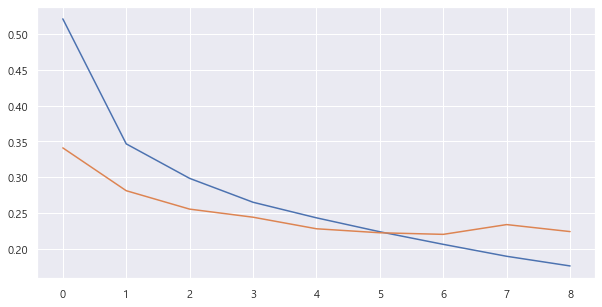

In [24]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [25]:
early_stopping_cb.stopped_epoch

8

In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2200 - accuracy: 0.9222


[0.22003868222236633, 0.922249972820282]

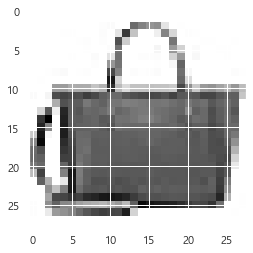

In [27]:
plt.imshow(X=val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [28]:
# 예측
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 92ms/step


array([[1.5817115e-15, 1.0706289e-20, 2.4185797e-19, 1.2009497e-16,
        1.6278293e-15, 4.1237198e-15, 6.7121967e-16, 1.8078129e-14,
        1.0000000e+00, 1.1674773e-13]], dtype=float32)

In [29]:
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=-1)
val_labels

1/1 [==============================] - 0s 17ms/step


array([8], dtype=int64)

In [30]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [33]:
print(classes[np.argmax(result)])

가방
